# K-NN이랑 K-클러스터링 기말고사에 나옴

## 혼자 공부하는 머신러닝+딥러닝(01-03, 02-01, 02-02)자료 활용
data : https://gist.github.com/rickiepark

우리가 머신러닝 엔지니어로 회사에 채용 됐다고 가정하고, 회사 업무를 진행!!!

### 1. 첫번째 과제 - 생선 분류

1. 마켓에서 살아있는 생선을 판매 시작.
2. 고객이 온라인으로 주문하면 가장 빠른 물류 센터에서 신선한 생선 곧바로 배송

>한 가지 문제가 발생
> - 물류센터 직원이 생선 구분을 잘 못함
> - 따라서 생선 이름을 자동으로 알려주는 머신러닝 모델 요구

- 생선은 "도미, "곤들매기", "농어", "강꼬치고기", "로치", "빙어", "송어"
- 생선분류 문제

>생선의 특징을 알면 구분하기 쉬울 것.
> - 길이와 무게 특징으로 분류

#### 1. 1 도미 데이터 준비하기

In [1]:
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [2]:
print(type(bream_length))
print(type(bream_weight))
print(len(bream_length))
print(len(bream_weight))

<class 'list'>
<class 'list'>
35
35


- 데이터 타입은 파이썬의 기본형 중 하나인 리스트이며 길이는 35

In [4]:
#### 1.2 빙어데이터 준비하기

In [5]:
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [6]:
print(type(smelt_length))
print(type(smelt_weight))
print(len(smelt_length))
print(len(smelt_weight))

<class 'list'>
<class 'list'>
14
14


matplotlib 모듈 사용하여 도미, 빙어를 무게와 길이 차원공간에 이산그래프로 표시

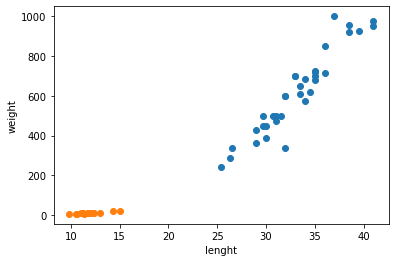

In [9]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 주황색: 빙어, 파란색: 도미

#### 1.3 데이터 전처리

- 생선 분류 모델 : 지도학습(정답이 필요)

>학습에 필요한 데이터
> - x_train: 특징데이터, 1쌍으로 묶는 전처리 과정 필요
> - y_train: 정답데이터 (도미인지, 빙어인지)

도미와 빙어 데이터 합치기

In [12]:
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

print(len(length))
print(len(weight))
print(length)
print(weight)

49
49
[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


무게와 길이 데이터를 한 쌍으로 만들기 -> [길이, 무게]

- 리스트 컴프리헨션 기법 : fish_data = [[l,w] for l,w in zip(length, weight)]
    - for l,w in zip(length, weight)]
        - zip : 하나씩 뽑음
            - in : l,w, 각각에 집어넣음
                - for : 리스트가 끝날때까지 반복

In [17]:
fish_data = [[l,w] for l,w in zip(length, weight)]

print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


정답(target)데이터 만들기
- 빙어:0 도미:1

In [22]:
fish_target = [1]*35 +[0]*14 #리스트에 정수곱하면 길이가 늘어남
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


#### 1.4 K-NN 분류 모델 

머신러닝 - 사이킷런 모듈 사용

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

모델 생성
- 모델 생성 함수 KNeighborClassifier()
- k값의 default는 5

In [29]:
kn=KNeighborsClassifier()

모델 학습
- 학습하는 함수 : fit
    - x_train, y_train 필요로 함

In [30]:
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

모델 평가
- 평가 함수 score()

In [31]:
kn.score(fish_data, fish_target)

1.0

- 평가점수 1.0 : 정확도 100퍼센트 ? 

실제 데이터 예측
- 예측 함수 predict()
- [30, 600] 데이터 가정
- 대괄호 두개 : 학습한 데이터와 똑같이 맞춰줘야 함!!!!

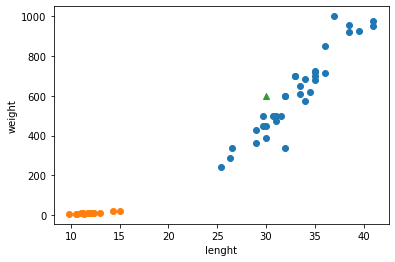

In [36]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30,600,marker='^')

plt.xlabel('lenght')
plt.ylabel('weight')
plt.show()

- 그래프에 표시된 것처럼 '도미'로 분류해야 제대로 예측

In [39]:
kn.predict([[30,600]]) #

array([1])

In [ ]:
- 도미로 예측, 정답임.

#### 1.6 k-nn단점
- 새로운 데이터에 대해 예측할 때 가장 가까운 직선거리에 어떤 데이터가 있는지 살핀다.
- 데이터가 많아야만 정확도가 올라가며 큰 메모리를 요구하고 직선거리 계산에 많은 시간이 요구된다.